## Assignment 3  Solution

Name or names:  Diego Santa Cruz

**Instructions:** Perform the a priori analysis of algorithms in the best case (25 QuickSort + 25 MergeSort) and the a posteriori analysis to obtain the average case (25 QS + 25 MS) + 10 bonus points for completing the MergeSort. If you obtain more than 100, you will be capped at 100 points.

## QuickSort

QuickSort is a sorting algorithm that involves taking the last element as the pivot, moving elements smaller than the pivot to the left and elements greater to the right. In the end, the pivot is placed between these two blocks, making it its final position, effectively sorting it. This process is repeated recursively for both the left and right sides (two recursive calls) until the entire array is sorted.

In [22]:
def partition(arr, left, right, verbose):
    global moves, comp
    pivot = arr[right]
    p1 = left -1
    p2 = right
    comp = comp + 1
    while p1 <p2:
        comp = comp + 1
        p1+=1
        p2-=1
        comp = comp + 1
        while arr[p1]<pivot: 
            p1+=1
            comp = comp + 1
        comp = comp + 1
        while arr[p2]>pivot: 
            p2-=1
            comp = comp + 1
        comp = comp + 1
        if p1 < p2:
            arr[p1],arr[p2] = arr[p2], arr[p1]
            moves = moves + 3
            if verbose: print(arr,"part")
    arr[p1], arr[right] = arr[right], arr[p1]
    moves = moves + 3
    if verbose: print(arr, "full part")
    return p1

def _quickSort(arr, left, right, verbose):
    global moves, comp
    if verbose: print(arr)
    comp = comp + 1
    if left >= right:  return 
    
    p = partition(arr, left, right,verbose)
    _quickSort(arr, left, p-1, verbose)
    _quickSort(arr,p+1,right,verbose)

def quickSort(arr,verbose=False):
    global moves, comp
    _quickSort(arr,0, len(arr)-1,verbose)
    
def quickSortCounts(arr, verbose=False):
    global moves, comp
    comp= 0
    moves = 0
    quickSort(arr, verbose)
    return moves, comp
    
arr = [12,34,54,67,34,45,12,565,78,23]
quickSortCounts(arr,False)

(27, 74)


### 1.1 Priori Analysis (Comparisons)

**Best-case scenario in comparisons**: The best case scenario occurs when the partition always divides the array in the middle into two smaller arrays of the same size. In this case we do two recursive calls each time for each of the new arrays, where the search space is reduced in half. Therefore we are in case 4 from the slides, and we have a quasilinear complexity ($n*log(n)$) for the comparisons in the best case.

**A priori best-case analysis (comparisons)**: (You may or may not use summations, but justify your response thoroughly, mentioning the partition and _quicksort functions)

*justify it well, don't just say it's Case X from the slides, explain why it falls into that case.*


### 1.2 A Posteriori Analysis

- Modify the given algorithm to return the number of comparisons and movements.
- Perform a priori analysis for random arrays of sizes 5 to 500 with increments of 5 and 100 runs for each array size.
- Graph the movements and comparisons.
- In the same graph, plot a line of $n log_2(n)$ to compare against the asymptote.


In [37]:
# Here the code is completed to gather all the data for plotting

# This function creates random arrays of size 'size' with values between minVal and maxVal
import random 
def createIntArray(size, minVal, maxVal):
    return [random.randint(minVal, maxVal) for x in range(size)]

#---------------------------------------------------------------------

''' minSize, maxSize: array sizes ranging from minSize to maxSize-1
    step: interval between array sizes: minSize, minSize+step, minSize+step*2, ..., maxSize
    runs: number of runs for each array size 
    Note: For each run, a random array is created and the sorting algorithm is executed'''
    
def dataToPlot(minSize=2, maxSize=100, step=1, runs=200, algorithm = quickSort):
    totalC = []# An array to store the average comparisons for each array size
    totalM = []# An array to store the average movements for each array size
    
    i=0
    for n in range(minSize,maxSize, step):
        totalC.append(0);
        totalM.append(0);
        for j in range(runs):
            arr = createIntArray(n,-10000,10000)
            cmp,mv = algorithm(arr,False)
            totalC[i]+= cmp
            totalM[i]+= mv
           
        totalC[i]=totalC[i]/runs;
        totalM[i]=totalM[i]/runs;
        i+= 1
    return totalC, totalM


comparisons 0.002n^2+(5.404)n+(-61.417)
moves 0.006n^2+(14.917)n+(-167.177)


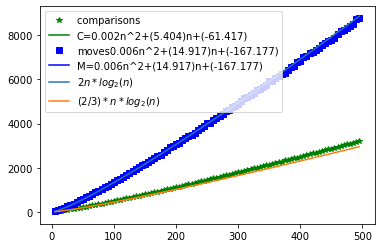

In [56]:
import numpy as np
import math 
import matplotlib.pyplot as plt



def plot_comparisons_and_moves_quickSort(minSize, maxSize, step, runs, algorithm):
    C, M = dataToPlot(minSize, maxSize, step, runs, algorithm)

    x=[x for x in range(minSize, maxSize, step)]
    # x2=[0.2*x*x for x in range(minSize, maxSize, step)]
    # xlgx=[x*math.log2(x) for x in range(minSize, maxSize, step)]

    Cfit = np.polyfit(x, C, 2)
    Cpoly = np.poly1d(Cfit)
    Ccoefs = "%.3fn^2+(%.3f)n+(%.3f)"%(Cfit[0],Cfit[1],Cfit[2])

    Mfit = np.polyfit(x, M, 2)
    Mpoly = np.poly1d(Mfit)
    Mcoefs = "%.3fn^2+(%.3f)n+(%.3f)"%(Mfit[0],Mfit[1],Mfit[2])
    print ("comparisons", Ccoefs)
    print ("moves", Mcoefs)

   
    plt.plot(x, C, 'g*', label="comparisons ") 
    plt.plot(x, Cpoly(x), 'g-', label="C="+Ccoefs) 
    plt.plot(x, M,'bs', label="moves"+Mcoefs) 
    plt.plot(x, Mpoly(x), 'b-', label="M="+Mcoefs) 
    
    z = [2*y*np.log2(y) for y in x]
    w = [(2/3)*y*np.log2(y) for y in x]
    plt.plot(x, z, label = "$2n*log_{2}(n)$")
    plt.plot(x, w, label = "$(2/3)*n*log_{2}(n)$")
    

    plt.legend()
    plt.show()
    
minSize = 5
maxSize = 500
step = 5
runs = 100
plot_comparisons_and_moves_quickSort(minSize, maxSize, step, runs, quickSortCounts)

# MergeSort

MergeSort involves recursively dividing the array into two parts until reaching an array of size 1. Then, the arrays are merged into a sorted array (left and right sides), repeating this process until the entire array is sorted.



2.1 Complete the MergeSort code (follow the comments only) (10 Bonus Points for this task).



In [58]:
def merge(array1, array2, verbose=False):
    global moves, comp
    result=[]
    a1Id =0  #array1
    a2Id =0  #array2
    totalLen = len(array1)+len(array2);
    for i in range (totalLen):
        comp = comp + 1
        if a2Id == len(array2) :
            result.append(array1[a1Id])
            moves = moves + 1
            a1Id+=1
        elif a1Id == len(array1):
            comp = comp + 1
            result.append(array2[a2Id])
            moves = moves + 1
            a2Id+=1
        elif array1[a1Id] < array2[a2Id]:
            comp = comp + 2
            result.append(array1[a1Id])
            moves = moves + 1
            a1Id+=1
        else:
            result.append(array2[a2Id])
            moves = moves + 1
            a2Id+=1
    #if verbose: print(result)
    return result

def mergeSort(array, verbose=False):
    global moves, comp
    comp += 1    

    #if verbose: print(array)
    
    # Termination condition: return the array if its size is 1
    if len(array) <= 1:
        return array
    # Get the midpoint
    mid = len(array)//2
    # Split the array into two: arrL and arrR
   
    arrL = array[:mid]# Left array
    arrR = array[mid:] # Right array
    moves = moves + len(array)
    
    # Call mergeSort recursively and obtain arrLSorted
    arrLSorted = mergeSort(arrL, verbose)
    # Call mergeSort recursively and obtain arrRSorted
    arrRSorted = mergeSort(arrR, verbose)
    # Return the merge
    return merge(arrLSorted, arrRSorted, verbose)

def mergeSortCounts(array, verbose = False):
    global moves, comp
    moves = comp = 0
    mergeSort(array, False)
    return moves,comp

moves = 0
comp = 0

arr = [12,34,54,67,34,45,12,565,78,23]
mergeSortCounts(arr, False) 



(68, 83)

2.2 Priori Analysis for Comparisons

In every case it has to do the same number of comparisons. And in each recursion, two new recursions arr called after creating arrL and arrR. And in each merge call, a linear number of comparisons is made. Therefore we are in case 4 from the slides and the complexity for the comparisons is $n*log(n)$.


*Your response here, justify it well, don't just say it's Case X from the slides, explain why it falls into that case.*



2.3 A Posteriori Analysis

*Do something similar to the a posteriori analysis of QuickSort.*


comparisons 0.007n^2+(15.077)n+(-194.899)
moves 0.007n^2+(16.316)n+(-192.575)


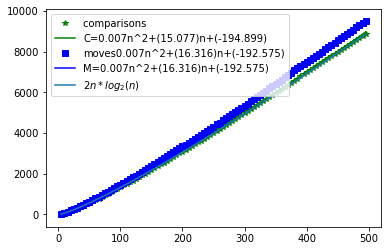

In [43]:
def plot_comparisons_and_moves_mergeSort(minSize, maxSize, step, runs, algorithm):
    C, M = dataToPlot(minSize, maxSize, step, runs, algorithm)

    x=[x for x in range(minSize, maxSize, step)]
    # x2=[0.2*x*x for x in range(minSize, maxSize, step)]
    # xlgx=[x*math.log2(x) for x in range(minSize, maxSize, step)]

    Cfit = np.polyfit(x, C, 2)
    Cpoly = np.poly1d(Cfit)
    Ccoefs = "%.3fn^2+(%.3f)n+(%.3f)"%(Cfit[0],Cfit[1],Cfit[2])

    Mfit = np.polyfit(x, M, 2)
    Mpoly = np.poly1d(Mfit)
    Mcoefs = "%.3fn^2+(%.3f)n+(%.3f)"%(Mfit[0],Mfit[1],Mfit[2])
    print ("comparisons", Ccoefs)
    print ("moves", Mcoefs)

   
    plt.plot(x, C, 'g*', label="comparisons ") 
    plt.plot(x, Cpoly(x), 'g-', label="C="+Ccoefs) 
    plt.plot(x, M,'bs', label="moves"+Mcoefs) 
    plt.plot(x, Mpoly(x), 'b-', label="M="+Mcoefs) 
    
    z = [2*y*np.log2(y) for y in x]
    
    plt.plot(x, z, label = "$2n*log_{2}(n)$")

    plt.legend()


minSize = 5
maxSize = 500
step = 5
runs = 100
plot_comparisons_and_moves_mergeSort(minSize, maxSize, step, runs, mergeSortCounts)

**QuickSort vs MergeSort** 

In conclusion (not an exercise), I mention some advantages I found for each algorithm as a QuickSort vs. MergeSort comparison:

- Quicksort has better locality of reference than mergesort, which means that the accesses performed in quicksort are usually faster than the corresponding accesses in mergesort.
- Quicksort uses worst-case O(log n) generated memory (if implemented correctly), while mergesort requires O(n) memory due to the overhead of merging.
- Quicksort is more efficient and works faster than merge sort in case of smaller array size or datasets
- Quick sort is preferred for arrays. 
- Merge sort is preferred for linked lists.
- MergeSort is stable by design, equal elements keep their original order.
- MergeSort is well suited to be implemented parallel (multithreading).
- MergeSort uses (about 30%) less comparisons than QuickSort. This is an often overlooked advantage, because a comparison can be quite expensive (e.g. when comparing several fields of database rows).